In [118]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

In [105]:
data_dir  = "../dataset"

In [106]:
data_list = glob.glob(os.path.join(data_dir, '**.csv'))
data_list

['../dataset\\submission_csv_file_random_example.csv',
 '../dataset\\x_test.csv',
 '../dataset\\x_train.csv',
 '../dataset\\y_train.csv']

In [107]:
id_col = 'ID'
target_col = "target"

In [108]:
y_train = pd.read_csv("%s/y_train.csv" % data_dir, sep=",")
x_train= pd.read_csv("%s/x_train.csv" % data_dir, sep=",")
x_test=pd.read_csv("%s/x_test.csv" % data_dir, sep=",")

In [79]:
train_df  = y_train.merge(x_train, on="ID")

In [80]:
train_df.head()

,ID,target,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
0,148,-3.403606,360,0,0.000000,0.000000,0.0,0.000000,0.029317,0.000000,...,0.004521,0.015771,0.009462,0.012697,0.019507,0.005101,0.010654,0.006971,-2.307230,0.646580
1,149,-2.904798,360,1,0.000000,0.000000,0.0,0.022056,0.000000,0.036711,...,0.008817,0.006589,0.005276,0.011648,0.011829,0.015558,0.001788,0.005251,-2.263960,0.487708
2,150,-2.337807,360,2,0.000000,0.000000,0.0,0.000000,0.022267,0.000000,...,0.018640,0.020972,0.012728,0.007921,0.000643,0.029692,0.016440,0.011970,-2.343106,0.544476
3,151,-2.285676,360,3,0.000000,0.007384,0.0,0.000000,0.000000,0.007417,...,0.013628,0.020397,0.016834,0.031869,0.012468,0.065173,0.048286,0.021237,-2.331621,0.633181
4,152,-2.606321,360,4,0.088086,0.109737,0.0,0.014648,0.003662,0.036627,...,0.008228,0.013394,0.009415,0.024983,0.019524,0.018342,0.008442,0.012525,-2.415575,0.880580


In [81]:
return_cols = [c for c in train_df.columns if c.startswith("abs_ret")]
volume_cols = [c for c in train_df.columns if c.startswith("rel_vol")]
date_col = ["day"]
prod_id_col=["pid"]
other_cols = ["LS" , "NLV"]

In [82]:
train_df.describe()

,ID,target,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
count,6.844820e+05,684482.000000,684482.000000,684482.000000,679486.000000,656703.000000,657590.000000,662537.000000,660968.000000,657137.000000,...,6.489580e+05,653719.000000,6.538930e+05,652452.000000,6.526000e+05,6.530030e+05,6.539240e+05,6.545230e+05,684482.000000,684482.000000
mean,6.862229e+05,-1.958691,449.451723,412.493759,0.397610,0.329012,0.255827,0.229207,0.204163,0.187032,...,1.434824e-02,0.016687,1.608437e-02,0.015683,1.590250e-02,1.580415e-02,1.618791e-02,1.679593e-02,-3.185075,-0.018128
std,4.166922e+05,0.909245,260.605228,231.328674,0.545231,0.420742,0.334599,0.292831,0.261129,0.240466,...,1.391984e-02,0.015841,1.481085e-02,0.014791,1.488205e-02,1.491830e-02,1.495403e-02,1.551244e-02,1.072115,1.002738
min,1.480000e+02,-7.137686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.141150e-07,0.000001,5.949603e-07,0.000002,9.098018e-07,4.569935e-07,7.343371e-07,5.313111e-07,-6.984719,-4.354836
25%,3.259202e+05,-2.513789,223.000000,214.000000,0.065317,0.066504,0.051724,0.047877,0.042548,0.037688,...,6.958855e-03,0.008045,7.936303e-03,0.007633,7.835704e-03,7.782268e-03,8.040234e-03,8.348497e-03,-4.113264,-0.814604
50%,6.630995e+05,-1.948804,450.000000,419.000000,0.244965,0.204975,0.158479,0.144023,0.128535,0.117270,...,1.126555e-02,0.012979,1.274427e-02,0.012393,1.262340e-02,1.253583e-02,1.289344e-02,1.337526e-02,-3.240612,-0.064327
75%,1.006950e+06,-1.395366,676.000000,613.000000,0.538841,0.442478,0.341006,0.305395,0.273262,0.250846,...,1.743560e-02,0.020260,1.967474e-02,0.019165,1.945499e-02,1.929470e-02,1.978127e-02,2.055370e-02,-2.469952,0.731298
max,1.536859e+06,3.580919,899.000000,804.000000,22.816667,16.633565,21.975230,11.778594,19.710468,33.171913,...,5.784701e-01,0.800878,7.837354e-01,0.636200,7.874362e-01,8.171950e-01,6.851355e-01,5.611044e-01,2.763198,4.443585


In [83]:
x_test

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
0,1070752,360,805,0.318973,0.000000,0.036477,0.060808,0.121546,0.036420,0.020217,...,0.005421,0.010815,0.008139,0.012176,0.014125,0.007319,0.010002,0.009969,-1.443817,0.666302
1,1070753,360,806,0.088113,0.076165,0.016047,0.224548,0.148030,0.004007,0.012021,...,0.003653,0.027143,0.030775,0.012852,0.010340,0.013970,0.015756,0.015426,-1.733723,0.691423
2,1070754,360,807,0.215629,0.095538,0.211088,0.071851,0.229358,0.262660,0.279140,...,0.015072,0.007164,0.012834,0.005153,0.016616,0.031887,0.000413,0.025075,-1.595646,0.708518
3,1070755,360,808,0.000000,0.498306,0.031819,0.027795,0.023813,0.099198,0.067608,...,0.013314,0.020483,0.016145,0.010154,0.035758,0.013969,0.020954,0.028234,-1.495998,0.674784
4,1070756,360,809,0.052521,0.064607,0.036336,0.121153,0.108871,0.302749,0.189150,...,0.013885,0.014365,0.015316,0.005626,0.017699,0.012703,0.018457,0.014863,-1.650134,0.928211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311739,2027595,596,1147,0.099453,0.494071,0.099305,0.148810,0.000000,0.149031,0.000000,...,0.011067,0.005888,0.006395,0.010777,0.014178,0.008334,0.002919,0.012722,-3.158218,-0.771778
311740,2027596,596,1148,0.101729,0.050994,0.127389,0.153061,0.767263,0.412159,0.205656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.439334,-1.131161
311741,2027597,596,1149,0.000000,0.103627,0.832900,0.413010,0.103681,0.622730,0.000000,...,0.013367,0.005079,0.015388,0.011558,0.013544,0.009696,0.032761,0.003646,-3.171627,-1.431447
311742,2027598,596,1150,0.000000,0.669413,0.051151,0.895370,1.315789,0.102354,0.765697,...,0.074456,0.011839,0.011825,0.006356,0.024702,0.027809,0.017024,0.024792,-3.073235,-1.268934


In [84]:
# Let's analyze stock number 1
stock_1 = train_df.loc[train_df['pid'] == 1]
stock_1

,ID,target,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
73368,145244,-2.122217,1,0,0.037272,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005387,0.005473,0.021898,0.050932,0.005442,0.040114,0.021456,0.005418,-1.986009,-0.851069
73369,145245,-0.483335,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018922,0.015108,0.002526,0.004898,0.022815,0.057084,0.003873,0.016391,-1.801845,-0.337335
73370,145246,-3.097364,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.044686,0.010542,0.039723,0.013378,0.003670,0.013264,0.002202,0.002148,-1.759012,-0.610176
73371,145247,-2.714733,1,3,0.357187,0.000000,0.012323,0.000000,0.000000,0.000000,...,0.006609,0.004383,0.005728,0.002219,0.006436,0.011048,0.009123,0.019401,-1.615954,-0.172240
73372,145248,-1.802809,1,4,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025240,0.019145,0.008298,0.016501,0.023122,0.032317,0.018517,0.020007,-1.915643,-0.533100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629513,1341132,-2.378632,1,800,0.551905,0.712965,0.340850,0.000000,0.591483,0.117540,...,0.004987,0.037660,0.011414,0.006475,0.010951,0.007477,0.003233,0.011358,-2.567767,-0.554505
629514,1341133,-2.908399,1,801,1.199166,0.463679,0.025907,0.129199,0.141935,0.180366,...,0.002159,0.009163,0.014439,0.004067,0.005220,0.012439,0.007025,0.007912,-2.426781,-0.488293
629515,1341134,-2.152086,1,802,0.471575,0.527426,0.397667,0.159659,0.026504,0.132661,...,0.009616,0.016214,0.021963,0.017083,0.017066,0.022503,0.016826,0.011247,-2.832981,-0.245936
629516,1341135,-3.093794,1,803,0.000000,2.450000,2.820065,1.452785,0.239234,0.595664,...,0.009664,0.020167,0.013257,0.013000,0.018371,0.011156,0.010370,0.009081,-1.610714,0.333201


In [85]:
stock_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 73368 to 629517
Columns: 128 entries, ID to NLV
dtypes: float64(125), int64(3)
memory usage: 808.3 KB


In [ ]:
#stock_1.loc[:, 'day'] = pd.to_datetime(stock_1.loc[:,'day'], format="%Y/%m/%d")

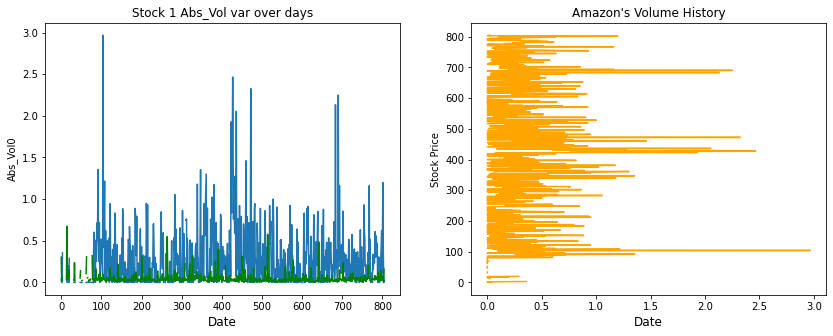

In [86]:
# Simple plotting of Stock1
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(stock_1["day"], stock_1["abs_ret0"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Abs_ret")
ax1.set_title("Stock1 Abs_return Var 0 over days")
# Second Subplot
ax1.plot(stock_1["day"], stock_1["rel_vol0"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Abs_Vol0")
ax1.set_title("Stock 1 Abs_Vol var over days")

# Fourth Subplot
ax2.plot(stock_1["abs_ret0"], stock_1["day"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Amazon's Volume History")
plt.show()


Quick strating kit

In [66]:
train_df.isnull().sum(axis=1)

In [61]:
x_test.isnull().sum(axis=1)

0          0
1          0
2          0
3          0
4          0
          ..
311739     0
311740    38
311741     0
311742     0
311743     2
Length: 311744, dtype: int64

In [ ]:
Interpoloate nan

In [109]:
x_train.iloc[:,3:] = x_train.iloc[:,3:].interpolate(axis=1)
x_test.iloc[:,3:]  = x_test.iloc[:,3:].interpolate(axis=1)

In [150]:
x_test.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
311739    0
311740    0
311741    0
311742    0
311743    0
Length: 311744, dtype: int64

## Feature engineering

Create basic feature

In [110]:
x_train['min_ret']    = np.min(x_train.iloc[:,3:63], axis=1)
x_train['max_ret']    = np.max(x_train.iloc[:,3:63], axis=1)
x_train['std_ret']    = np.std(x_train.iloc[:,3:63], axis=1)
x_train['median_ret'] = np.median(x_train.iloc[:,3:63], axis=1)

In [113]:
x_test['min_ret']    = np.min(x_test.iloc[:,3:63], axis=1)
x_test['max_ret']    = np.max(x_test.iloc[:,3:63], axis=1)
x_test['std_ret']    = np.std(x_test.iloc[:,3:63], axis=1)
x_test['median_ret'] = np.median(x_test.iloc[:,3:63], axis=1)

In [116]:
x_train['min_vol']    = np.min(x_train.iloc[:,64:125], axis=1)
x_train['max_vol']    = np.max(x_train.iloc[:,64:125], axis=1)
x_train['std_vol']    = np.std(x_train.iloc[:,64:125], axis=1)
x_train['median_vol'] = np.median(x_train.iloc[:,64:125], axis=1)

In [117]:
x_test['min_vol']    = np.min(x_test.iloc[:,64:125], axis=1)
x_test['max_vol']    = np.max(x_test.iloc[:,64:125], axis=1)
x_test['std_vol']    = np.std(x_test.iloc[:,64:125], axis=1)
x_test['median_vol'] = np.median(x_test.iloc[:,64:125], axis=1)

Validation

In [ ]:
from sklearn.model_selection import train_test_split

train_df  = y_train.merge(x_train, on="ID")
train_df.drop(['ID', 'day','pid'], axis=1, inplace=True)
train_df = train_df.reset_index()

train_X_, test_X_, train_y_, test_y_ = train_test_split(train_df.iloc[:,1:], train_df['target'], test_size=0.2, random_state=42)

In [ ]:
        features_train, features_test, labels_train, labels_test =\
            train_test_split(features, labels, test_size=test_size)

In [ ]:
from sklearn.linear_model import LinearRegression

regrLinWeighted = LinearRegression()
regrLinWeighted.fit(train_X_, train_y_, sample_weight=(1./train_y_))